In [2]:
#import files
import os
import json
import pprint
import pandas as pd
import numpy as np
import requests

import json
import geojson
import folium

import sklearn

from folium.features import GeoJsonTooltip
from geopy.geocoders import Nominatim

import seaborn as sns
import matplotlib.pyplot as plt


from datetime import datetime



In [3]:
#all are from consumerfinance.gov from 1.1.20XX to 12.31.20YY being load as debt_collect_XXYY 

#Product is Debt Collection, Focus on Untimely Response

# loading the json
with open("debt_complaints_untimely_response 2014-2022.json") as debt_collect:
    debt_collect = json.load(debt_collect) 

In [4]:
issue = []
company = []
company_response = []
complaint_long_desc = []
consumer_disputed =[]
state = []
year= []
month=[]
month_year=[]

for x in range(len(debt_collect)): 
    company.append(debt_collect[x]['_source']['company'])
    issue.append(debt_collect[x]['_source']['issue'])
    company_response.append(debt_collect[x]['_source']['company_response'])
    consumer_disputed.append(debt_collect[x]['_source']['consumer_disputed'])
    state.append(debt_collect[x]['_source']['state'])
    date_time_obj = datetime.fromisoformat(debt_collect[x]['_source']['date_received'])
    year.append(date_time_obj.year)
    month.append(date_time_obj.month)

    
debt_df = pd.DataFrame({'issue': issue, "company":company, "company_response":company_response,"state":state, 'year':year, 'month':month})


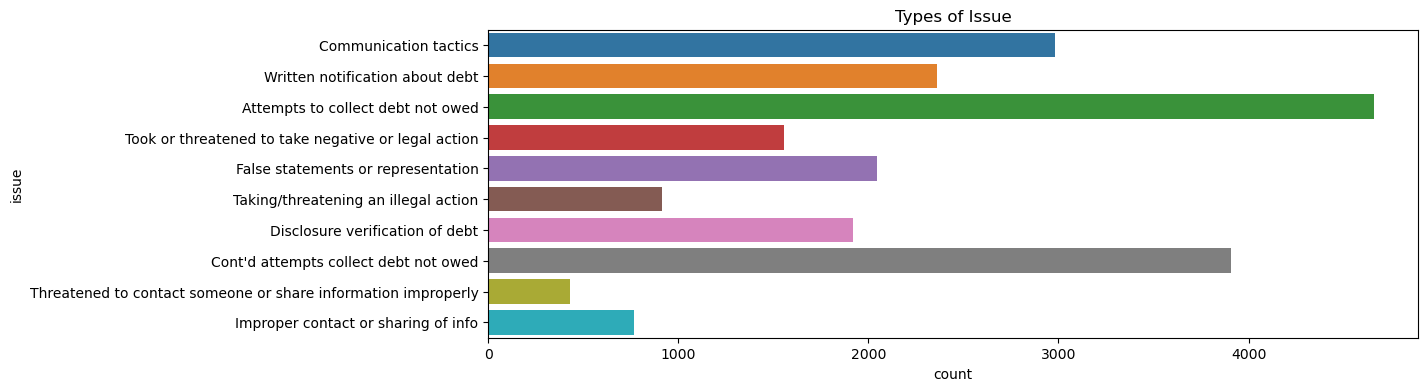

In [5]:
#starting with issue
#color palete
sns.set_palette('tab10')
#create a barplot to see mindset
plt.figure(figsize=(12, 4))
sns.countplot(y='issue', data=debt_df)
    
plt.title('Types of Issue')
plt.show()


In [6]:
#state count
state_df=debt_df.groupby(['state']).count().reset_index()
state_df = state_df.drop(columns=['company','month','issue','year'])
state_df = state_df.rename(columns = {'company_response': 'counts'})
state_df

,state,counts
0,AE,6
1,AK,25
2,AL,301
3,AP,4
4,AR,103
5,AZ,485
6,CA,2896
7,CO,330
8,CT,132
9,DC,93


In [7]:
# folium to see the state to see an overview of
with open('us-states.json') as f:
    geojson_data = json.load(f)
map = folium.Map(location=[37.0902, -95.7129], zoom_start=5, 
                  min_zoom=5, 
                  max_zoom=5
                )

# Add the choropleth layer to the map
folium.Choropleth(
   geo_data=geojson_data,
   name='choropleth',
   data=state_df,
   columns=['state', 'counts'],
   key_on='feature.id',
   fill_color='YlOrBr',
   fill_opacity=0.9,
   line_opacity=1,
   legend_name='Issue per State'
).add_to(map)
# Add tooltips for state names with a custom font
folium.features.GeoJson(
    geojson_data,
    name='State Names',
    tooltip=folium.features.GeoJsonTooltip(
        fields=['name'], 
        aliases=['State'],
        style='font-family: Impact; font-size: 20px;'
    ),
    style_function=lambda x: {'color': 'transparent', 'weight': 0.5}
    
).add_to(map)

map.save(outfile= "Map of 2014-2022 Untimely Response.html")


folium.LayerControl().add_to(map)

map


In [31]:
state_df_extra= pd.read_csv('filter_state.csv') 
state_df_extra=state_df_extra.drop(columns=['Unnamed: 0'])
# mergin state_df_extra with state df
merged_df_state = pd.merge(state_df, state_df_extra, on = 'state')

merged_df_state

,state,counts,densityMi,pop2023,pop2022,pop2020,pop2010,growthRate,area
0,AK,25,1.28449,732984,733583,732923,710231,-0.00082,570641
1,AL,301,100.67620,5098746,5074296,5031362,4779736,0.00482,50645
2,AR,103,58.86715,3063152,3045637,3014195,2915918,0.00575,52035
3,AZ,485,65.61541,7453517,7359197,7179943,6392017,0.01282,113594
4,CA,2896,249.81347,38915693,39029342,39501653,37253956,-0.00291,155779
5,CO,330,56.62333,5868555,5839926,5784865,5029196,0.00490,103642
6,CT,132,749.49504,3629055,3626205,3597362,3574097,0.00079,4842
7,DC,93,11062.54098,674815,671803,670868,601723,0.00448,61
8,DE,94,529.49461,1031985,1018396,992114,897934,0.01334,1949
9,FL,2036,422.59351,22661577,22244823,21589602,18801310,0.01873,53625


In [33]:

abbrevs={
    "AL": "Alabama",
    "AK": "Alaska",
    "AS": "American Samoa",
    "AZ": "Arizona",
    "AR": "Arkansas",
    "CA": "California",
    "CO": "Colorado",
    "CT": "Connecticut",
    "DE": "Delaware",
    "DC": "District of Columbia",
    "FM": "Federated States Of Micronesia",
    "FL": "Florida",
    "GA": "Georgia",
    "GU": "Guam",
    "HI": "Hawaii",
    "ID": "Idaho",
    "IL": "Illinois",
    "IN": "Indiana",
    "IA": "Iowa",
    "KS": "Kansas",
    "KY": "Kentucky",
    "LA": "Louisiana",
    "ME": "Maine",
    "MH": "Marshall Islands",
    "MD": "Maryland",
    "MA": "Massachusetts",
    "MI": "Michigan",
    "MN": "Minnesota",
    "MS": "Mississippi",
    "MO": "Missouri",
    "MT": "Montana",
    "NE": "Nebraska",
    "NV": "Nevada",
    "NH": "New Hampshire",
    "NJ": "New Jersey",
    "NM": "New Mexico",
    "NY": "New York",
    "NC": "North Carolina",
    "ND": "North Dakota",
    "MP": "Northern Mariana Islands",
    "OH": "Ohio",
    "OK": "Oklahoma",
    "OR": "Oregon",
    "PW": "Palau",
    "PA": "Pennsylvania",
    "PR": "Puerto Rico",
    "RI": "Rhode Island",
    "SC": "South Carolina",
    "SD": "South Dakota",
    "TN": "Tennessee",
    "TX": "Texas",
    "UT": "Utah",
    "VT": "Vermont",
    "VI": "Virgin Islands",
    "VA": "Virginia",
    "WA": "Washington",
    "WV": "West Virginia",
    "WI": "Wisconsin",
    "WY": "Wyoming"
}
merged_df_state.state.replace(abbrevs, inplace=True)
merged_df_state
merged_df_state.to_csv('dashboard_powerbi_examination.csv')

In [ ]:
#One of the issue we have is that while we have all the sum of issue count from 2014-2022, our population are static in 2010, 2020 and 2022
# I wonder if I can see a correlation between growth rate, density and  others

# Using PowerBI, most of what we see are clearly like before

# Most population correlate but exception in Georgia, Florida and Massaschusette, Again with state there is much more data needed.

In [ ]:
#variable needed all together

#the one from the CFPB
#untimely
#map the state into three 6 states and other regions based on populations
#map the issue in to different category

#the one for Ipsim
#income
#age
#family
#demographic
#population density

In [ ]:
#testing upload in linux Mint 
